In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('../../data/08.Regression_for_hyperparameters/Best_models_by_ST098_and_LL_validation_summaries_with_range_stats.csv')
data = data.groupby('sp').first().reset_index(drop=False)

# import re
# pat = re.compile(r'ent(?P<ent>[\d\.e-]+)_dist(?P<dist>[\d\.e-]+)_pow(?P<pow>[\d\.e-]+).hdf5')

# ents, dists, pows = [], [], []
# for fn in data['model'].values:
#     m = pat.search(fn)
#     if not m:
#         continue
#     ents.append(float(m.group('ent')))
#     dists.append(float(m.group('dist')))
#     pows.append(float(m.group('pow')))

# data['ent'] = ents
# data['dist'] = dists
# data['pow'] = pows



## Gourp by order?

In [5]:
sum_ = data['ent'] + data['dist']
data['ent'] = data['ent']/sum_
data['dist'] = data['dist']/sum_
# Because the ent + dist chanegs for the relative weight of obs, and the weight obs is simply for matching the S&T distribution, we might 
# need to normalize it.

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print('Order clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['ORDER1_eBird']]))
print('Family clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['FAMILY1_eBird']]))
print('Family clustering silhouette score (passerine only)', silhouette_score(StandardScaler().fit_transform(
    data[data['ORDER1_eBird']=='Passeriformes'][['ent','dist','pow']]), 
    data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))

print('======== for each hyperparameter =======')
for hyperparam in ['ent', 'dist', 'pow']:
    print(f'Order clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['ORDER1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['FAMILY1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam}) (passerine only)', silhouette_score(StandardScaler().fit_transform(
        data[data['ORDER1_eBird']=='Passeriformes'][[hyperparam]]), 
        data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))


Order clustering silhouette score -0.6521027549228766
Family clustering silhouette score -0.6751968829421332
Family clustering silhouette score (passerine only) -0.6873204707931571
======== for each hyperparameter =======
Order clustering silhouette score (for ent) -0.8335622877332447
Family clustering silhouette score (for ent) -0.8252561430450134
Family clustering silhouette score (for ent) (passerine only) -0.8571649172063078
Order clustering silhouette score (for dist) -0.8335622877332528
Family clustering silhouette score (for dist) -0.8252561428634252
Family clustering silhouette score (for dist) (passerine only) -0.8571649179162111
Order clustering silhouette score (for pow) -0.8803923756391143
Family clustering silhouette score (for pow) -0.8364293033059363
Family clustering silhouette score (for pow) (passerine only) -0.8158999469521223


/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y 

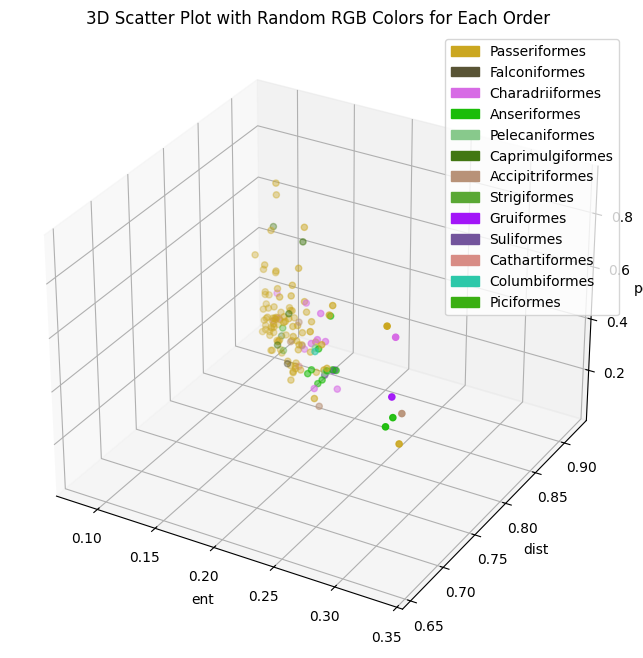

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['ORDER1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['ORDER1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1))

plt.show()

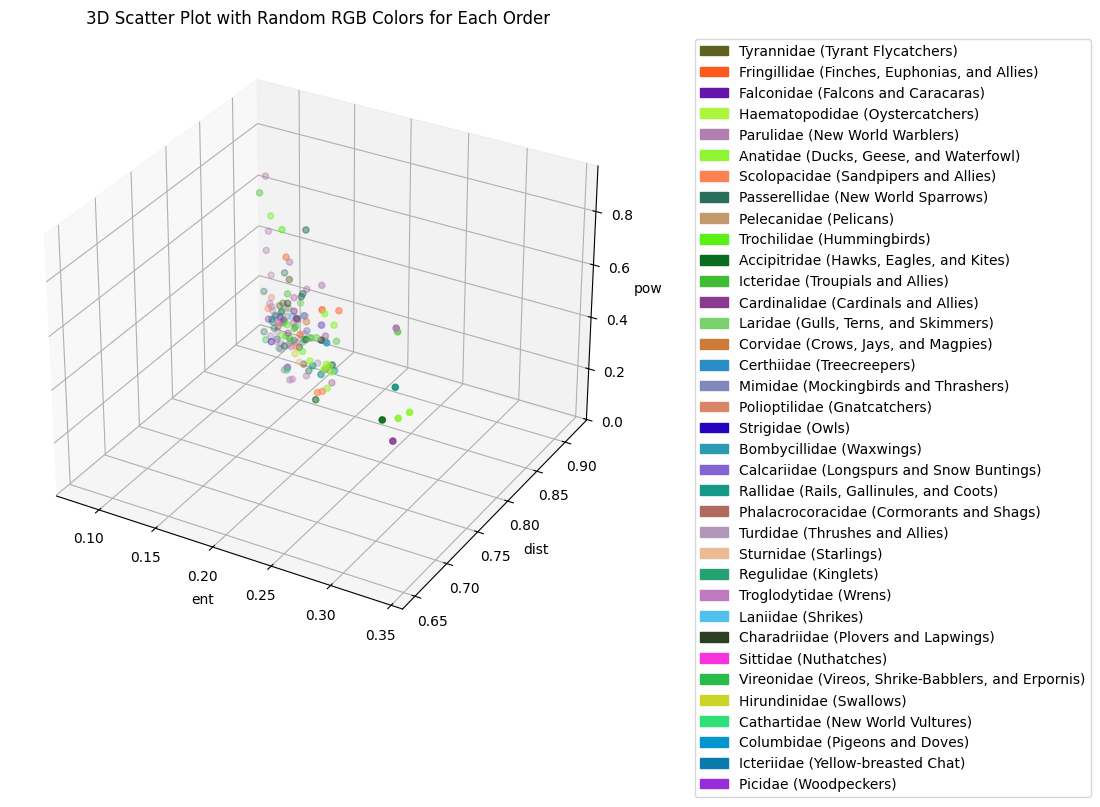

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['FAMILY1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['FAMILY1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.1, 1))

plt.show()

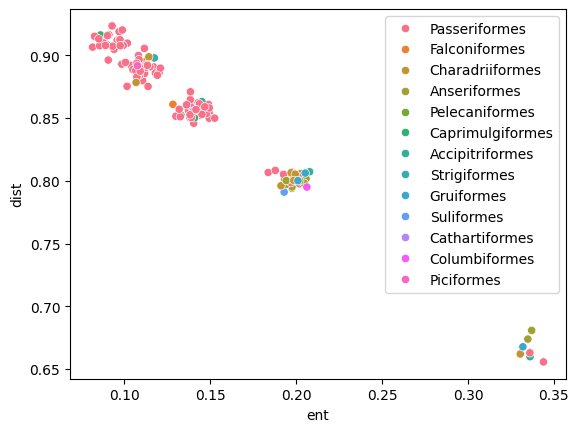

In [9]:
sns.scatterplot(
    x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


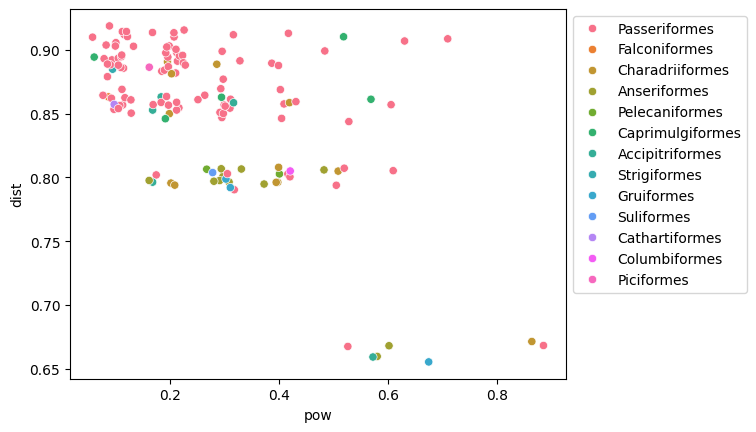

In [10]:
sns.scatterplot(
    x = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


## PCA

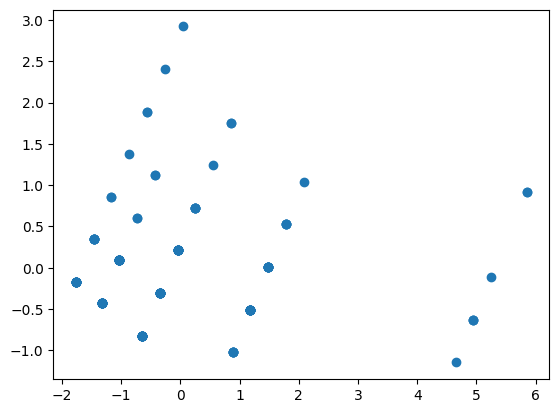

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2).fit(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
pca.explained_variance_ratio_
res = pca.transform(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
plt.scatter(res[:,0], res[:,1])


In [12]:
data['common_name'].unique()

array(['Acadian Flycatcher', 'American Goldfinch', 'American Kestrel',
       'American Oystercatcher', 'American Redstart', 'American Wigeon',
       'American Woodcock', 'American Tree Sparrow',
       'American White Pelican', "Anna's Hummingbird",
       'Bay-breasted Warbler', 'Bald Eagle', 'Baltimore Oriole',
       'Black-and-white Warbler', 'Black-bellied Whistling-Duck',
       'Blackburnian Warbler', 'Black-chinned Hummingbird',
       'Black-headed Grosbeak', 'Blackpoll Warbler', 'Black Skimmer',
       'Blue Jay', 'Brown-headed Cowbird', 'Broad-billed Hummingbird',
       'Brown Creeper', 'Brown Pelican', 'Brown Thrasher',
       'Broad-winged Hawk', 'Black-throated Blue Warbler',
       'Black-throated Green Warbler', 'Blue-gray Gnatcatcher',
       "Bullock's Oriole", 'Burrowing Owl', 'Blue-winged Teal',
       'Blue-winged Warbler', 'California Gull', 'Cape May Warbler',
       'Canada Goose', 'Canvasback', 'Canada Warbler', "Cassin's Finch",
       'Cedar Waxwing', 'Cer

In [13]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.83845657 0.16154343]
[[-0.61082556  0.50377005  0.61082556]
 [ 0.35621922  0.86383779 -0.35621922]]


Text(0, 0.5, 'PC2')

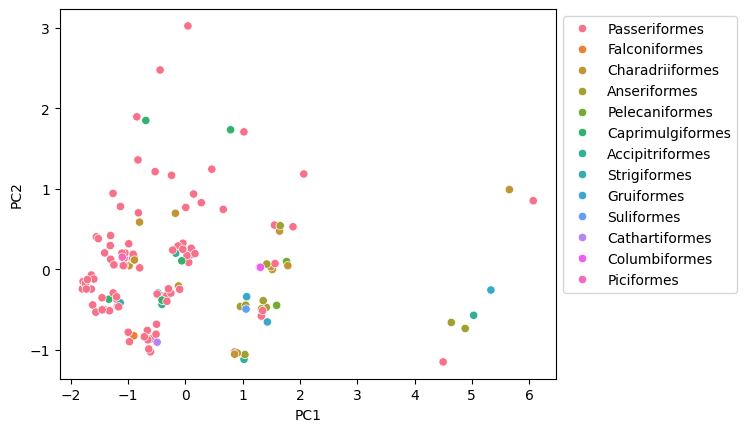

In [14]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

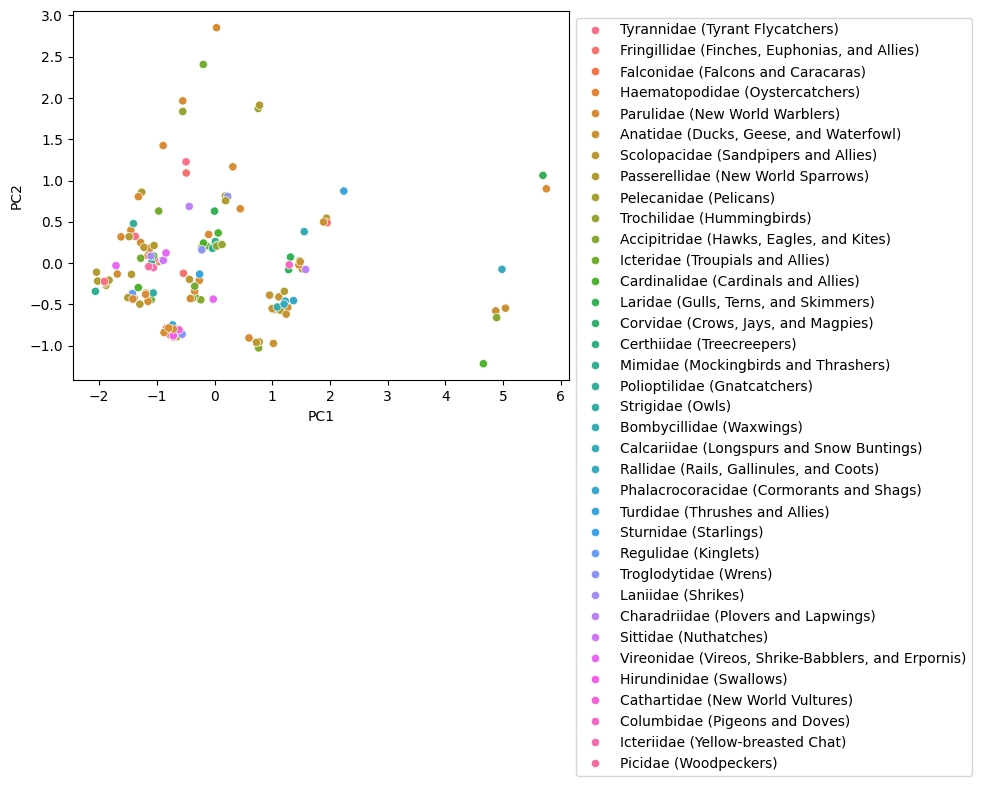

In [15]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['FAMILY1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [16]:
data['PC1'] = res[:,0]
data['PC2'] = res[:,1]

In [17]:
data[data['PC2']>=3]

,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,end_traverse_cor,end_traverse_cor_log,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2


Text(0, 0.5, 'PC2')

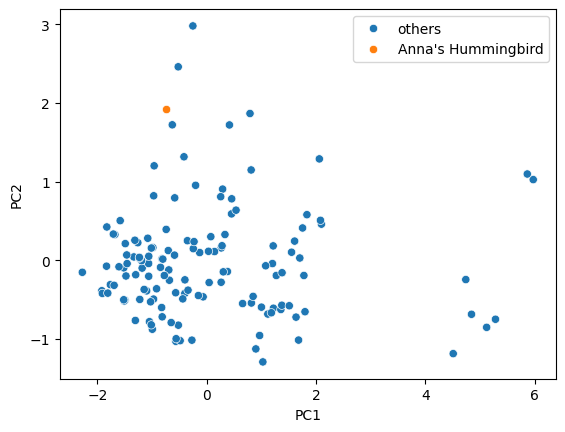

In [18]:
the_name = lambda x:"Anna's Hummingbird" if x=="Anna's Hummingbird" else "others"
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/5, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/5, size=data.shape[0]),
    hue = [the_name(i) for i in data['common_name'].values]
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')


# RandomForest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from scipy.stats import pearsonr

In [20]:
OneHotEncoder().fit_transform(data[['ORDER1_eBird']]).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(137, 13))

(array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1.]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ]),
 <BarContainer object of 10 artists>)

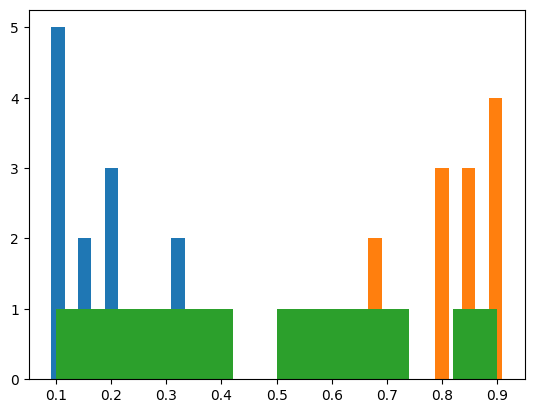

In [21]:
plt.hist(data['ent'].unique())
plt.hist(data['dist'].unique())
plt.hist(data['pow'].unique())

In [22]:
data

,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,end_traverse_cor,end_traverse_cor_log,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,acafly,1,Acadian Flycatcher,ST098_and_LL,acafly_2022_150km_obs1.0_ent0.0075188_dist0.04...,2.801470,2.479577,0.273232,0.275911,224.545796,196.424186,213.592887,163.526925,0.588504,0.621695,0.402098,0.666667,0.995741,0.895533,0.867268,1.06,78019.797114,0.785167,0.33,8384.394333,0.860426,1.51,47700.950326,0.868680,0.08,3570.306749,41,0.142857,0.857143,0.1,obs1.0_ent0.0075188_dist0.045113_pow0.1,17,0,24,2,0,16,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best CV R² score     : 0.24229770064646647
Param:  ent 
 0.266026713063389 
 PearsonRResult(statistic=np.float64(0.5366055607356518), pvalue=np.float64(0.00024894170261359396)) 
 SignificanceResult(statistic=np.float64(0.6368880363804238), pvalue=np.float64(5.771120291193326e-06))
[('Mass', np.float64(0.21057809830193544)), ('postbreeding_lat_max', np.float64(0.17949841699928865)), ('Beak_Width', np.float64(0.10903693033678907)), ('Kipps_Distance', np.float64(0.0952183092736416)), ('Beak_Depth', np.float64(0.05370412334014296)), ('Hand.Wing_Index', np.float64(0.027221041077491317)), ('breeding_lon_min', np.float64(0.026676861244544034)), ('postbreeding_abundance_variation', np.float64(0.023212495778399796)), ('Beak_Length_Culmen', np.float64(0.0172034862007189)), ('prebreeding_lon_min', np.float64(0.017028605249796012)), ('prebreeding_lat_max', np.float64(0.01651998670810746)), ('Tail_Length', np.floa

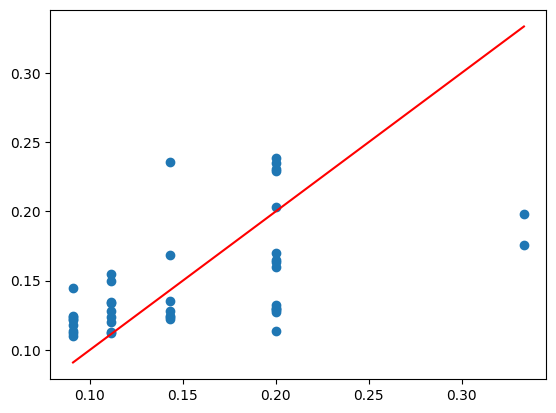


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best CV R² score     : 0.2494710323531791
Param:  dist 
 0.2744821648700959 
 PearsonRResult(statistic=np.float64(0.5428256552738793), pvalue=np.float64(0.00020391821428806)) 
 SignificanceResult(statistic=np.float64(0.6584887112189859), pvalue=np.float64(2.1348590457919445e-06))
[('Mass', np.float64(0.21570760147957918)), ('postbreeding_lat_max', np.float64(0.17966061781593426)), ('Beak_Width', np.float64(0.10461458642770655)), ('Kipps_Distance', np.float64(0.09502308418294395)), ('Beak_Depth', np.float64(0.05114487257013562)), ('Hand.Wing_Index', np.float64(0.02798159783518982)), ('breeding_lon_min', np.float64(0.026262496679878802)), ('postbreeding_abundance_variation', np.float64(0.020143673921710667)), ('prebreeding_lon_min', np.float64(0.018656146855743027)), ('Beak_Length_Culmen', np.float64(0.017128581533391026)), ('nonbreeding_abundance_variation', np.float64(0.016943486491208058)), ('nonbre

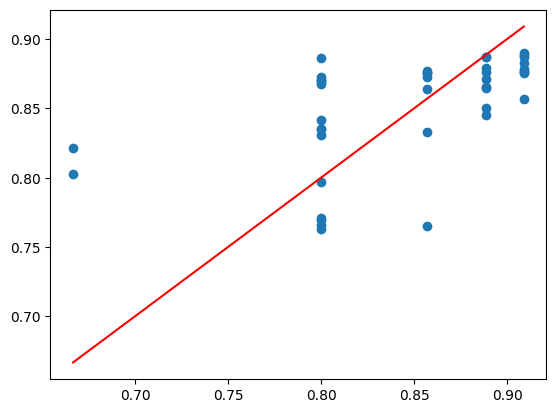


Best hyperparameters: {'max_depth': 2, 'min_samples_split': 20, 'n_estimators': 100}
Best CV R² score     : 0.32422162032253066
Param:  pow 
 0.05781189326356362 
 PearsonRResult(statistic=np.float64(0.35810227044541987), pvalue=np.float64(0.01988323185081678)) 
 SignificanceResult(statistic=np.float64(0.25088287898803124), pvalue=np.float64(0.10902553990073666))
[('postbreeding_abundance_variation', np.float64(0.38978461698267275)), ('breeding_abundance_variation', np.float64(0.1356545415783647)), ('prebreeding_abundance_variation', np.float64(0.10002247019266403)), ('Beak_Width', np.float64(0.053919528897090944)), ('breeding_range_size', np.float64(0.04537820688745401)), ('Beak_Length_Nares', np.float64(0.0444177934258664)), ('Beak_Depth', np.float64(0.0412811919241215)), ('postbreeding_range_size', np.float64(0.03396549846775423)), ('prebreeding_range_size', np.float64(0.024200316396857945)), ('postbreeding_lon_min', np.float64(0.024100513282481143)), ('prebreeding_lat_max', np.flo

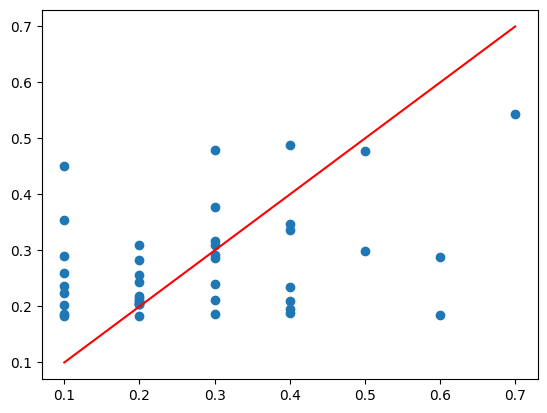

In [23]:
var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
 'nonbreeding_lon_c',
 'nonbreeding_lat_c',
 'nonbreeding_lat_max',
 'nonbreeding_lat_min',
 'nonbreeding_lon_max',
 'nonbreeding_lon_min',
 'nonbreeding_range_size',
 'nonbreeding_abundance_variation',
 'prebreeding_lon_c',
 'prebreeding_lat_c',
 'prebreeding_lat_max',
 'prebreeding_lat_min',
 'prebreeding_lon_max',
 'prebreeding_lon_min',
 'prebreeding_range_size',
 'prebreeding_abundance_variation',
 'breeding_lon_c',
 'breeding_lat_c',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_lon_max',
 'breeding_lon_min',
 'breeding_range_size',
 'breeding_abundance_variation',
 'postbreeding_lon_c',
 'postbreeding_lat_c',
 'postbreeding_lat_max',
 'postbreeding_lat_min',
 'postbreeding_lon_max',
 'postbreeding_lon_min',
 'postbreeding_range_size',
 'postbreeding_abundance_variation']
X = data[var_].fillna(-999)

def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

###
metircs = []
for y_name in ['ent','dist','pow']:
    y = data[y_name].fillna(-999)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestRegressor(n_estimators=100, oob_score=True)
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth':    [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10, 20]
    }
    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=5, 
        scoring='r2', 
        n_jobs=1, 
        return_train_score=True
    )
    grid.fit(X_train, y_train)
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV R² score     :", grid.best_score_)
    best_model = grid.best_estimator_

    pred_test = best_model.predict(X_test)
    pred_train = best_model.predict(X_train)
    train_y_true_y_pred_df = pd.DataFrame({'y_train':y_train, 'y_train_pred':pred_train})
    test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
    train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
    test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)

    print(
        'Param: ', y_name,
        '\n',
        r2_score(y_test.values, pred_test),
        '\n',
        pearsonr(y_test.values, pred_test),
        '\n',
        spearmanr(y_test.values, pred_test),
    )

    best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

    metircs.append({'hyperparameter':y_name,
                    **grid.best_params_, 
                    'CV':5, 
                    'Best_model_CV_R2':grid.best_score_,
                    'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
                    'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
                    'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
                    'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
                    'r2_train':r2_score(y_train.values, pred_train),
                    'pearsonr_train':pearsonr(y_train.values, pred_train)[0],
                    'pearsonr_p_train':pearsonr(y_train.values, pred_train)[1],
                    'spearmanr_train':spearmanr(y_train.values, pred_train)[0],
                    'spearmanr_p_train':spearmanr(y_train.values, pred_train)[1],
                    'r2_test':r2_score(y_test.values, pred_test),
                    'pearsonr_test':pearsonr(y_test.values, pred_test)[0],
                    'pearsonr_p_test':pearsonr(y_test.values, pred_test)[1],
                    'spearmanr_test':spearmanr(y_test.values, pred_test)[0],
                    'spearmanr_p_test':spearmanr(y_test.values, pred_test)[1],
                    })

    print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
    feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
    feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

    ## plot y_true vsd y_pred
    plt.scatter(
        y_test.values, pred_test
    )
    plt.plot([np.min(y_test.values), np.max(y_test.values)],
            [np.min(y_test.values), np.max(y_test.values)], color='red')
    plt.show()

    print()

metircs = pd.DataFrame(metircs)
metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


In [69]:
dir(grid)


['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [ ]:
data


,Unnamed: 0,sp,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,end_traverse_cor,end_traverse_cor_log,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,1,acafly,Acadian Flycatcher,ST098_and_LL,acafly_2022_150km_obs1.0_ent0.0075188_dist0.04...,2.801470,2.479577,0.273232,0.275911,224.545796,196.424186,213.592887,163.526925,0.588504,0.621695,0.402098,0.666667,0.995741,0.895533,0.867268,1.06,78019.797114,0.785167,0.33,8384.394333,0.860426,1.51,47700.950326,0.868680,0.08,3570.306749,41,0.142857,0.857143,0.1,obs1.0_ent0.0075188_dist0.045113_pow0.1,17,0,24,2,0,16,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,

<Axes: xlabel='Mass', ylabel='ent'>

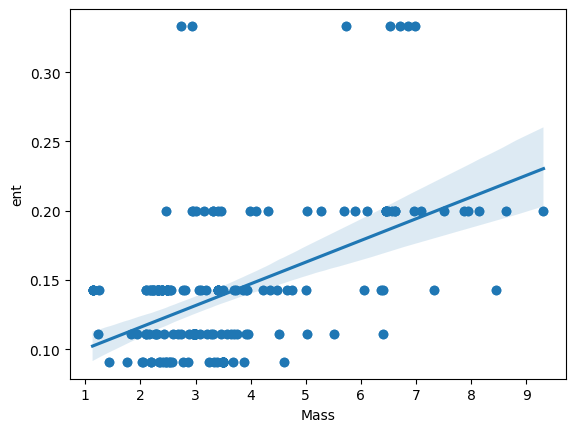

In [ ]:
# plt.scatter(
#     np.log(data['Mass']),
#     data['ent']
# )

sns.regplot(
    x=np.log(data['Mass']),
    y=data['ent']
)


<Axes: xlabel='Mass', ylabel='dist'>

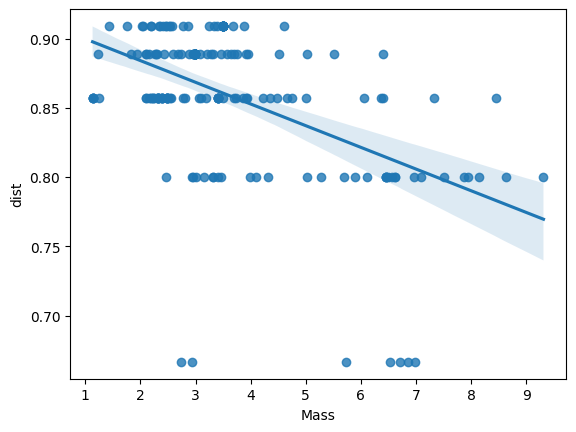

In [46]:
sns.regplot(
    x=np.log(data['Mass']),
    y=data['dist']
)


In [50]:
from scipy.stats import pearsonr
pearsonr(np.log(data['postbreeding_abundance_variation']),
        data['pow'])


PearsonRResult(statistic=np.float64(0.6455507697884938), pvalue=np.float64(9.933706906166103e-25))

In [54]:
tmp = data[['Mass', 'pow']].dropna()

pearsonr(np.log(tmp['Mass']),
         tmp['pow'])


PearsonRResult(statistic=np.float64(0.226642869395843), pvalue=np.float64(0.001571274487182913))

<Axes: xlabel='postbreeding_abundance_variation', ylabel='pow'>

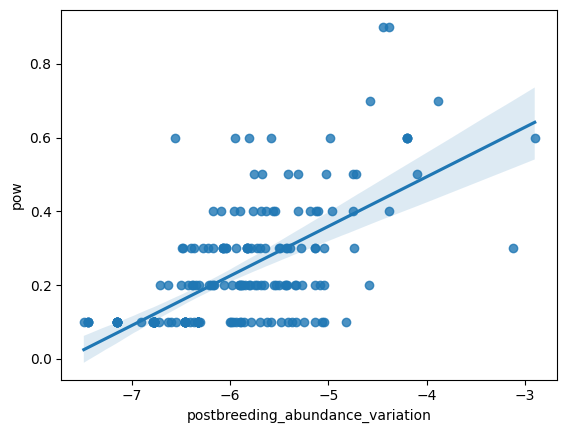

In [48]:
sns.regplot(
    x=np.log(data['postbreeding_abundance_variation']),
    y=data['pow']
)
